# Machine Learning Approach with Python

This notebook covers the basic Machine Learning process in Python step-by-step.

## **Table of Contents:**
* Introduction
* Breif History of RMS Titanic
* Import Libraries
* Loading the Data
* Data Exploration / Analysis
* Visualizing Data
* Data Preprocessing
    - Missing Data
    - Feature Engineering
    - Converting Features
* Building Machine Learning Models
    - Splitting up the training & test data.
    - Training 10 different models
    - Which is the best model ?
    - K-Fold Cross Validation 
    - Hyperparameter Tuning    
    - Confusion Matrix
* Submission
* Summary

## **Introduction**

In this kernel, I will go through the whole process of creating several machine learning models on the famous Titanic dataset, which is used by many people as beginner guide for getting started with Data Science / Machine Learning. It provides information on the fate of passengers on the Titanic, summarized according to economic status (class), sex, age, and survival. In this challenge, we are asked to predict whether a passenger on the Titanic would have been survived or not. Let us go through step by step process to match our prediction with the actual result.

## **Breif History of RMS Titanic**

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

## **Import Libraries**
*Note: As this is a step by step tutorial we will import the model based libraries later in the tutorial*

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
sns.set(font_scale=1) # default settings for cleaner graphs

# another data visualization
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

## **Loading the Data**

#### Load the train & test data

In [2]:
# This creates a pandas dataframe and assigns it to the train variable.
train_df = pd.read_csv("../input/train.csv")

In [3]:
# This creates a pandas dataframe and assigns it to the test variable.
test_df = pd.read_csv("../input/test.csv")

## **Data Exploration/Analysis**

In [4]:
# Print the first 5 rows of the train dataframe.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Print the first 5 rows of the test dataframe.
# note their is no Survived column here which is our target varible we are trying to predict
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# lets print data info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


_**From the above information we can say that the training-set has a total of 891 examples and 11 features + the target variable (survived). 2 of the features are floats (Age, Fare), 5 are integers(PassengerId, Survived, Pclass, SibSp, Parch) and 5 are objects(Name, Sex, Ticket, Cabin, Embarked). Below I have listed the features with a short description:**_


    survival:	Survival status (0 - Not Survived, 1 - Survived)
    PassengerId: Unique Id of a passenger.
    pclass:	Ticket class	
    sex:	Sex	
    Age:	Age in years	
    sibsp:	Number of siblings / spouses aboard the Titanic	
    parch:	Number of parents / children aboard the Titanic	
    ticket:	Ticket number	
    fare:	Passenger fare	
    cabin:	Cabin number	
    embarked:	Port of Embarkation


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that **38% of the training-set survived the Titanic**. Age and Fare are measured on very different scaling, So we need to do feature scaling before predictions.  On top of that, we can already detect some features, that contain missing values, like the **'Age'** feature.

## **Visualizing Data**

*Let's compare certain features with survival to see which one **correlates** better. Also Visualizing data is crucial for recognizing underlying patterns to exploit in the model.*

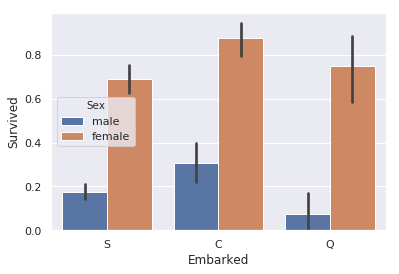

In [8]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train_df);
# From below we can see that Male/Female that Emarked from C have higher chances of survival 
# compared to other Embarked points.

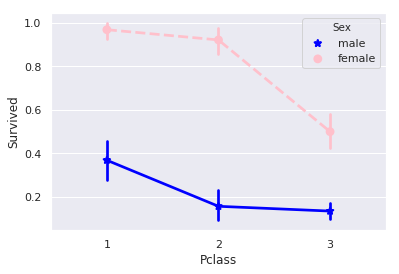

In [9]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train_df,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

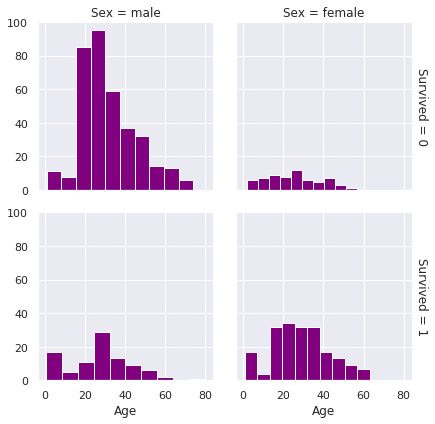

In [10]:
g = sns.FacetGrid(train_df, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

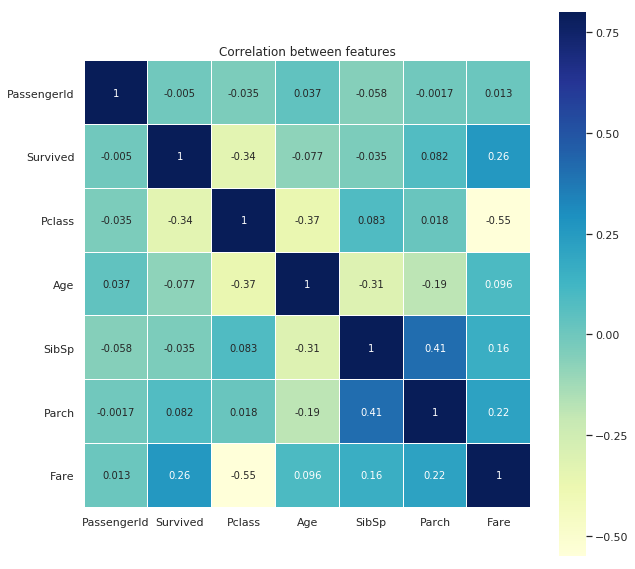

In [11]:
corr=train_df.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

## **Data Preprocessing**

### **Dealing with missing values**

**It's important to fill missing values because some machine learning algorithms can't accept them eg SVM.**

*On the contrary, filling missing values with the mean/median/mode is also a prediction which may not be 100% accurate, instead, you can use models like Decision Trees and Random Forest which handles missing values very well.*

In [12]:
#lets see which are the columns with missing values in train dataset
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

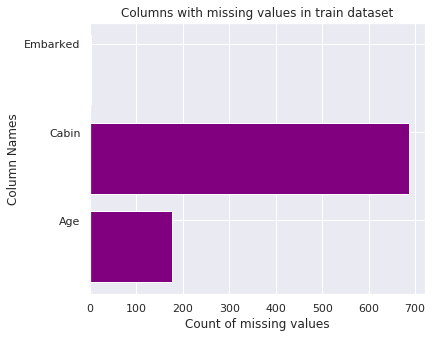

In [13]:
labels = []
values = []
null_columns = train_df.columns[train_df.isnull().any()]
for col in null_columns:
    labels.append(col)
    values.append(train_df[col].isnull().sum())

ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Columns with missing values in train dataset");

In [14]:
#lets see which are the columns with missing values in test dataset
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

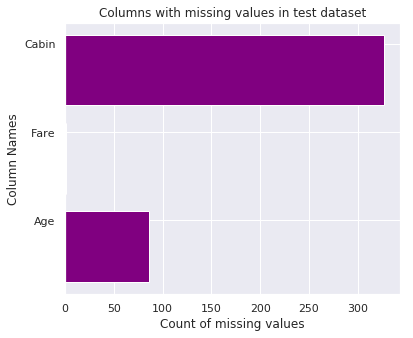

In [15]:
labels = []
values = []
null_columns = test_df.columns[test_df.isnull().any()]
for col in null_columns:
    labels.append(col)
    values.append(test_df[col].isnull().sum())

ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Columns with missing values in test dataset");

### Fill Missing Values in Embarked Column (train dataset)

In [16]:
#Lets check which rows have null Embarked column
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**PassengerId 62 and 830** have missing embarked values

Both have ***Passenger class 1*** , ***fare $80.*** , ***Ticket - 113572*** and ***Cabin - B28***

Lets plot a graph to visualize and try to guess from where they embarked

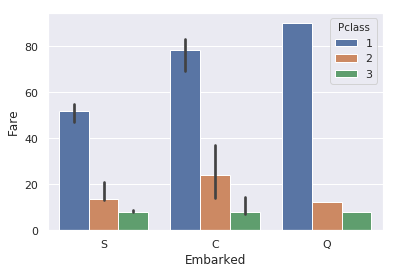

In [17]:
from numpy import median
sns.barplot(x="Embarked", y="Fare", hue="Pclass", data=train_df, estimator=median)

We can see that for ***1st class*** median line is coming around ***fare $80*** for ***embarked*** value ***'C'***.
So we can replace NA values in Embarked column with 'C'

In [18]:
train_df["Embarked"] = train_df["Embarked"].fillna('C')

### Fill Missing Values in Fare Column (test dataset)

In [19]:
#Lets check which rows have null Fare column in test dataset
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [20]:
# we can replace missing value in fare by taking median of all fares of those passengers
# who share 3rd Passenger class and Embarked from 'S' , so lets find out those rows
test_df[(test_df['Pclass'] == 3) & (test_df['Embarked'] == 'S')].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [21]:
# now lets find the median of fare for those passengers.

def fill_missing_fare(df):
    median_fare = df[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]['Fare'].median()
    df["Fare"] = df["Fare"].fillna(median_fare)
    return df

test_df = fill_missing_fare(test_df)

### Fill Missing Values in Age Column (train & test dataset)

**When dealing with large missing values in a particular column, simply removing the feature does not make sense when the feature is relevant in prediction.**

Age seems to be a promising feature.
So it doesn't make sense to simply fill null values out with a median/mean/mode.

We will use ***Random Forest*** algorithm to predict ages. 

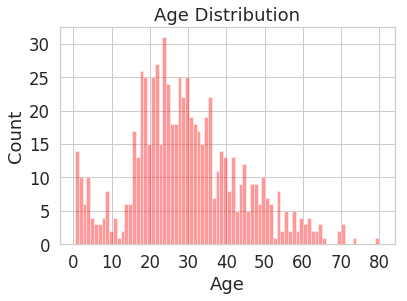

In [22]:
# age distribution in train dataset
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(train_df["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="red")
    plt.title("Age Distribution")
    plt.ylabel("Count")

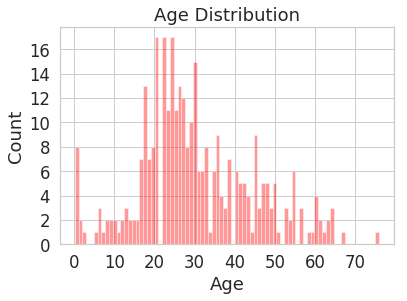

In [23]:
# age distribution in test dataset
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(test_df["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="red")
    plt.title("Age Distribution")
    plt.ylabel("Count")

In [24]:
# predicting missing values in age using Random Forest
# import the RandomForestRegressor Object
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(df):
    
    #Feature set
    age_df = df[['Age','Pclass','SibSp','Parch','Fare']]
    
    # Split sets into train and test
    train  = age_df.loc[ (df.Age.notnull()) ]# known Age values
    test = age_df.loc[ (df.Age.isnull()) ]# null Ages
    
    # All age values are stored in a target array
    y = train.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

In [25]:
train_df = fill_missing_age(train_df)
test_df = fill_missing_age(test_df)

_**Note: We will deal some of the features with missing values in Feature Engineering Section**_

## **Feature Engineering**

### Cabin
**We will build a new feature called 'Deck' from Cabin, and remove the Cabin feature from the final dataset**

In [26]:
train_df["Deck"] = train_df.Cabin.str[0] # the first character denotes which deck the passenger is allocated
test_df["Deck"] = test_df.Cabin.str[0]
train_df["Deck"].unique() # 0 is for null values

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

/home/user/anaconda2/envs/my_env/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/user/anaconda2/envs/my_env/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


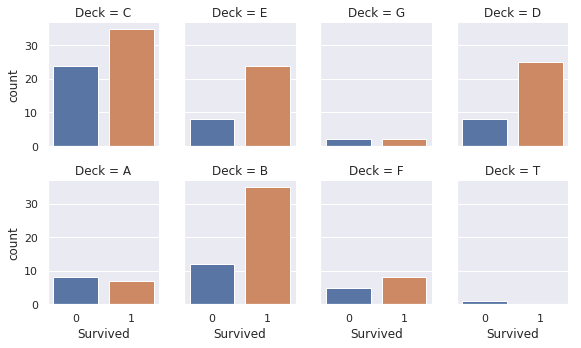

In [27]:
sns.set(font_scale=1)
g = sns.factorplot("Survived", col="Deck", col_wrap=4,
                    data=train_df[train_df.Deck.notnull()],
                    kind="count", size=2.5, aspect=.8);

_From the above figure we can see that Deck C & B has the higher number of survival, contrary they have the higher number of non-survival too._

In [28]:
train_df.Deck.fillna('Z', inplace=True)
test_df.Deck.fillna('Z', inplace=True)

sorted_deck_values = train_df["Deck"].unique() # Z is for null values
sorted_deck_values.sort()
sorted_deck_values

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Z'], dtype=object)

In [29]:
# Drop Cabin Feature from final dataset for test and train
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

### **SibSp and Parch**:
SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that shows if someone is not alone.

In [30]:
data = [train_df, test_df]

for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/home/user/anaconda2/envs/my_env/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/user/anaconda2/envs/my_env/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


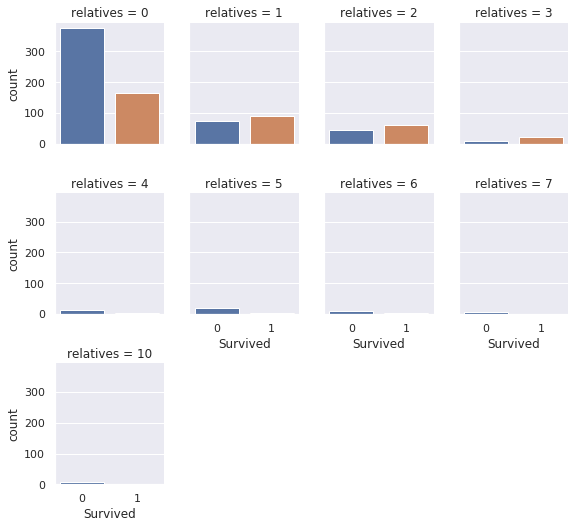

In [31]:
sns.set(font_scale=1)
sns.factorplot("Survived", col="relatives", col_wrap=4,
                    data=train_df,
                    kind="count", size=2.5, aspect=.8);

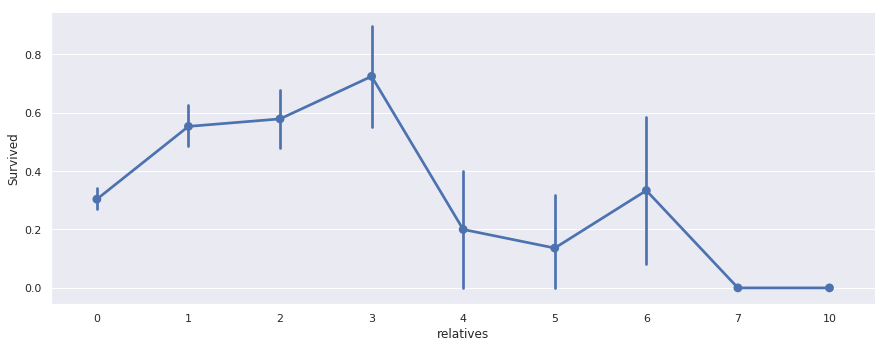

In [32]:
sns.catplot('relatives','Survived',kind='point', 
                      data=train_df, aspect = 2.5, )

Here we can see that you had a high probability of survival with 1 to 3 relatives, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

### Name
**We will build a new feature called 'Title' from Name, and remove the Name feature from the final dataset**

In [33]:
data = [train_df, test_df]

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [34]:
# Drop Name Feature from final dataset for test and train
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

## **Converting Features, Transforming Data and Cleanup**
In below section, we will
- convert categorical features(Title, Sex, Deck, Embarked) into numerical type.
- Feature Scaling 'Age' & 'Fare' 
- drop ticket feature

In [35]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,relatives,not_alone,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Z,1,0,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,C,1,0,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Z,0,1,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,S,C,1,0,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Z,0,1,Mr


### **Converting Title Feature**

In [36]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    
    # filling NaN with 0, to be safe
    dataset['Title'] = dataset['Title'].fillna(0)

### **Converting 'Sex' feature intor numeric**

In [37]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

### **Converting 'Deck' feature intor numeric**

In [38]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8, "Z": 9}
data = [train_df, test_df]

for dataset in data:
    dataset['Deck'] = dataset['Deck'].map(deck)

### **Converting 'Embarked' feature intor numeric**

In [39]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

### **Drop Ticket Feature**

In [40]:
train_df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique values, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [41]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

## **Feature Scaling**
We can see that Age, Fare are measured on different scales, so we need to do Feature Scaling first before we proceed with predictions.

In [42]:
from sklearn.preprocessing import StandardScaler

data = [train_df, test_df]

for dataset in data:
    std_scale = StandardScaler().fit(dataset[['Age', 'Fare']])
    dataset[['Age', 'Fare']] = std_scale.transform(dataset[['Age', 'Fare']])

In [43]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,relatives,not_alone,Title
0,1,0,3,0,-0.561898,1,0,-0.502445,0,9,1,0,1
1,2,1,1,1,0.612709,1,0,0.786845,1,3,1,0,3
2,3,1,3,1,-0.268246,0,0,-0.488854,0,9,0,1,2
3,4,1,1,1,0.392470,1,0,0.420730,0,3,1,0,3
4,5,0,3,0,0.392470,0,0,-0.486337,0,9,0,1,1


In [44]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,relatives,not_alone,Title
0,892,3,0,0.362023,0,0,-0.497079,2,9,0,1,1
1,893,3,1,1.327524,1,0,-0.511942,0,9,1,0,3
2,894,2,0,2.486125,0,0,-0.463770,2,9,0,1,1
3,895,3,0,-0.217278,0,0,-0.482143,0,9,0,1,1
4,896,3,1,-0.603478,1,1,-0.417167,0,9,2,0,3


## **Building Machine Learning Models**

In this section, we will be dealing with the following parts.

First, separate the features(X) from the labels(y). 

**X_train:** All features minus the value we want to predict (Survived) from the training set.

**y_train:** Only the value we want to predict(Survived) from the training set. 

**X_test:** All features from the test set.

Second, we will use multiple classifiers from Scikit-learn library to train on the dataset, to find out which classifier works the best.

Third, we will run the best classifier through the K-Fold pattern to identify its mean accuracy and std deviation

And finally, evaluate the effectiveness of the best trained classifier on the final test data set.

### **Splitting up the training & test data.**

In [45]:
X_train = train_df.drop(['Survived', 'PassengerId'], axis=1)
y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1)

### Training the Classification Algorithms

Now that we have preprocessed the data and built our training and testing datasets, we can start to deploy different classification algorithms. It's relatively easy to test multiple models; as a result, we will compare and contrast the performance of 10 different algorithms.

In [46]:
# Now that we have our dataset, we can start building algorithms! 
# We'll need to import each algorithm we plan on using

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # (Naive Bayes)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# define scoring method
scoring = 'accuracy'

# Define models to train

names = ["Random Forest", "AdaBoost","Nearest Neighbors", 
         "Naive Bayes","Decision Tree","Logistic Regression","Gaussian Process",
         "SVM RBF", "SVM Linear", "SVM Sigmoid"]

classifiers = [
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    KNeighborsClassifier(n_neighbors = 3),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=5),
    LogisticRegression(random_state = 0),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    SVC(kernel = 'rbf', random_state=0),
    SVC(kernel = 'linear', random_state=0),
    SVC(kernel = 'sigmoid', random_state=0)
]

models = dict(zip(names, classifiers))

### **Which is the best Model ?**

In [47]:
# Lets determine the accuracy score of each classifier

models_accuracy_score = []

for name in models:
    model = models[name]
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    models_accuracy_score.append((name, round(accuracy_score(y_train, predictions)* 100, 2)))

In [48]:
results = pd.DataFrame({
    'Model': names,
    'Score': [curr_model_score[1] for curr_model_score in models_accuracy_score]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
87.54,Nearest Neighbors
85.86,Gaussian Process
85.19,Decision Tree
84.51,SVM RBF
84.18,AdaBoost
83.95,Random Forest
82.04,SVM Linear
81.71,Logistic Regression
79.12,Naive Bayes


As we can see that K-Nearest Neighbors classifier goes on the first place. We will perform GridSearch to find optimal parameters for our best classifier

But first, let us check, how K-Nearest Neighbors classifier performs when we use k-fold cross validation.

### **K-Fold Cross Validation**

In [49]:
# import K-fold class
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# define seed for reproducibility
seed = 1

kfold = KFold(n_splits=10, random_state = seed)
model = KNeighborsClassifier(n_neighbors = 3)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

print("Model Name: KNN")
print("Scores:", cv_results)
print("Mean:", cv_results.mean())
print("Standard Deviation:", cv_results.std())

Model Name: KNN
Scores: [0.76666667 0.82022472 0.76404494 0.80898876 0.79775281 0.82022472
 0.76404494 0.82022472 0.84269663 0.84269663]
Mean: 0.804756554307116
Standard Deviation: 0.029033368697361474


## **Hyperparameter Tuning**

Let us find out what are the optimal parameters for K-Nearest Neighbors classifier to get better accuracy

_**Note: the following section might take some few minutes to process**_

In [50]:
# Applying Grid Search to find the best parameters
from sklearn.model_selection import GridSearchCV

classifier = KNeighborsClassifier()

parameters = [{'n_neighbors': np.arange(1,25), 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 
               'leaf_size': np.arange(1,15), 'p': [1,2]}
             ]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


print("Accuracy: ", round(best_accuracy * 100, 2))
print("Best Params: ", best_parameters)

Accuracy:  82.49
Best Params:  {'algorithm': 'ball_tree', 'leaf_size': 2, 'n_neighbors': 22, 'p': 1}


**Let us test the K-Nearest Neighbors classifier again with the new optimal parameters**

In [51]:
# perform classification again using optimal parameter from grid search cv
classifier = grid_search.best_estimator_
classifier.fit(X_train, y_train)
y_train_predictions = classifier.predict(X_train)
y_test_predictions = classifier.predict(X_test)

print("Model accuracy score: ", round(accuracy_score(y_train, y_train_predictions) * 100, 2))

Model accuracy score:  83.84


### **Confusion Matrix**
Now that we have a proper model, let's evaluate it's performance in a more accurate way using confusion matrix.

In [52]:
# confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_predictions)

array([[501,  48],
       [ 96, 246]])

## **Submission**

In [53]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_test_predictions
    })
submission.to_csv('submission.csv', index=False)
output = pd.DataFrame({ 'PassengerId' : test_df["PassengerId"], 'Survived': y_test_predictions })
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## **Summary**

This project helped me in understanding ML/Data Science fundamentals and concepts that I learned from various books and online tutorials to apply to a problem. This project had a heavy focus on the data preparation part since this is what data scientists work on most of their time.

I started with understanding the problem and what output is expected. During data exploration section I got to understand more about the data and what features are associated. Visualising Data helped me in understanding what features can be relevant for better prediction and also understand the correlation between features. The most part that I enjoyed was data preprocessing because the cleaner and relevant the data I provide the better the algorithms work. Feature Engineering and Feature Scaling section helped me improve features quality for better prediction. Then I trained the input data on 10 different machine learning models, picked one of them with better accuracy score to predict the output. Overall I enjoyed learning and building a machine learning program and improving my ML/Data Science knowledge.